In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [9]:
df = pd.read_csv("BTC-USD.csv")

In [10]:
# Standardize columns
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

In [11]:
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True
)

model.fit(df)

19:02:23 - cmdstanpy - INFO - Chain [1] start processing
19:02:24 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    "prophet_btc_forecast.csv",
    index=False
)

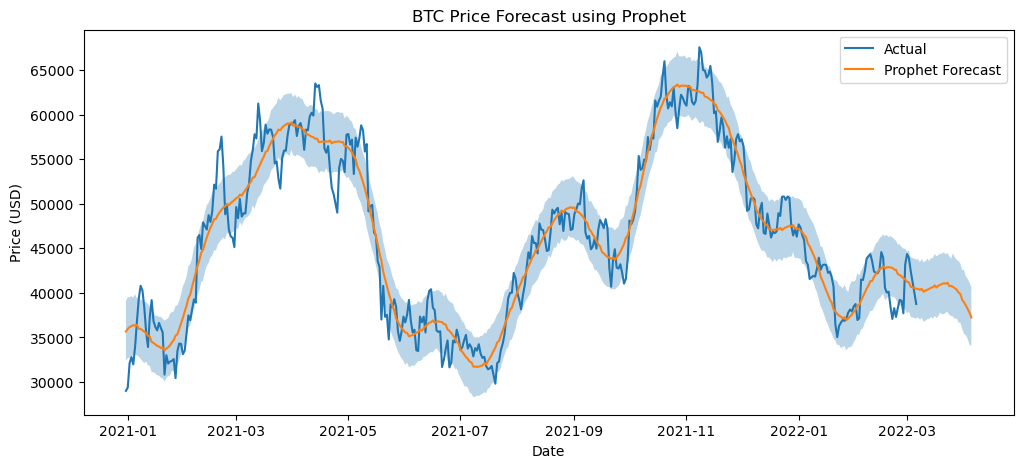

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['ds'], df['y'], label="Actual")
plt.plot(forecast['ds'], forecast['yhat'], label="Prophet Forecast")
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    alpha=0.3
)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("BTC Price Forecast using Prophet")
plt.legend()
plt.show()